In [1]:
import json

import pandas as pd
import numpy as np

from datetime import datetime, timedelta

In [2]:
feature_data = pd.read_csv('./merged_filtered_feature_data.csv')
feature_data = feature_data.drop(columns=['Unnamed: 0'])

bfi_data = pd.read_csv('merged_unfiltered_bfi_data.csv')[['pid', 'date', \
                                    'BFI10_extroversion_PRE', \
                                    'BFI10_agreeableness_PRE', \
                                    'BFI10_conscientiousness_PRE', \
                                    'BFI10_neuroticism_PRE', \
                                    'BFI10_openness_PRE']]
ema_data = pd.read_csv('merged_unfiltered_ema_data.csv')[['pid', 'date', \
                                    'positive_affect_EMA', \
                                    'negative_affect_EMA']]

In [3]:
print('bfi_data Columns')
for col in bfi_data.columns:
    print(col)
print('\n')
print('ema_data Columns')
for col in ema_data.columns:
    print(col)
print('\n')
print('feature_data Columns')
for col in feature_data.columns:
    print(col)

bfi_data Columns
pid
date
BFI10_extroversion_PRE
BFI10_agreeableness_PRE
BFI10_conscientiousness_PRE
BFI10_neuroticism_PRE
BFI10_openness_PRE


ema_data Columns
pid
date
positive_affect_EMA
negative_affect_EMA


feature_data Columns
pid
date
f_blue:phone_bluetooth_doryab_countscansmostfrequentdevicewithinsegmentsall:allday
f_blue:phone_bluetooth_doryab_uniquedevicesall:evening
f_call:phone_calls_rapids_missed_count:allday
f_call:phone_calls_rapids_outgoing_countmostfrequentcontact:allday
f_call:phone_calls_rapids_incoming_countmostfrequentcontact:allday
f_loc:phone_locations_barnett_hometime:allday
f_loc:phone_locations_barnett_disttravelled:allday
f_loc:phone_locations_barnett_siglocsvisited:allday
f_loc:phone_locations_barnett_wkenddayrtn:allday
f_screen:phone_screen_rapids_sumdurationunlock:morning
f_screen:phone_screen_rapids_countepisodeunlock:evening
f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain:allday
f_slp:fitbit_sleep_intraday_rapids_maxdurationasleepunifiedmain:even

In [4]:
extracted_data = {
    'f_blue:phone_bluetooth_doryab_countscansmostfrequentdevicewithinsegmentsall:allday_avg': [],
    'f_blue:phone_bluetooth_doryab_countscansmostfrequentdevicewithinsegmentsall:allday_std': [],
    'f_blue:phone_bluetooth_doryab_uniquedevicesall:evening_avg': [],
    'f_blue:phone_bluetooth_doryab_uniquedevicesall:evening_std': [],
    'f_call:phone_calls_rapids_missed_count:allday_avg': [],
    'f_call:phone_calls_rapids_missed_count:allday_std': [],
    'f_call:phone_calls_rapids_outgoing_countmostfrequentcontact:allday_avg': [],
    'f_call:phone_calls_rapids_outgoing_countmostfrequentcontact:allday_std': [],
    'f_call:phone_calls_rapids_incoming_countmostfrequentcontact:allday_avg': [],
    'f_call:phone_calls_rapids_incoming_countmostfrequentcontact:allday_std': [],
    'f_loc:phone_locations_barnett_hometime:allday_avg_weekdays': [],
    'f_loc:phone_locations_barnett_hometime:allday_std_weekdays': [],
    'f_loc:phone_locations_barnett_hometime:allday_avg_weekend': [],
    'f_loc:phone_locations_barnett_disttravelled:allday_avg_weekdays': [],
    'f_loc:phone_locations_barnett_disttravelled:allday_std_weekdays': [],
    'f_loc:phone_locations_barnett_disttravelled:allday_avg_weekend': [],
    'f_loc:phone_locations_barnett_siglocsvisited:allday_avg_weekdays': [], 
    'f_loc:phone_locations_barnett_siglocsvisited:allday_avg_weekend': [],
    'f_loc:phone_locations_barnett_wkenddayrtn:allday_avg_weekdays': [],
    'f_loc:phone_locations_barnett_wkenddayrtn:allday_avg_weekend': [],
    'f_screen:phone_screen_rapids_sumdurationunlock:morning_avg': [],
    'f_screen:phone_screen_rapids_sumdurationunlock:morning_std': [],
    'f_screen:phone_screen_rapids_countepisodeunlock:evening_avg': [],
    'f_screen:phone_screen_rapids_countepisodeunlock:evening_std': [],
    'f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain:allday_avg': [],
    'f_slp:fitbit_sleep_intraday_rapids_maxdurationasleepunifiedmain:evening_max_week': [],
    'f_slp:fitbit_sleep_intraday_rapids_ratiodurationawakeunifiedwithinmain:morning_avg': [],
    'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday_avg': [],
    'f_steps:fitbit_steps_intraday_rapids_sumsteps:allday_std': [],
    'f_steps:fitbit_steps_intraday_rapids_countepisodesedentarybout:allday_avg': [],
    'f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout:allday_avg': [],
    'f_steps:fitbit_steps_intraday_rapids_maxdurationsedentarybout:allday_max_week': [],
    'f_steps:fitbit_steps_intraday_rapids_countepisodeactivebout:allday_avg': [],
    'f_steps:fitbit_steps_intraday_rapids_sumdurationactivebout:allday_avg': [],
    'f_steps:fitbit_steps_intraday_rapids_maxdurationactivebout:allday_max_week': [],
    'BFI10_extroversion_PRE': [],
    'BFI10_agreeableness_PRE': [], 
    'BFI10_conscientiousness_PRE': [],
    'BFI10_neuroticism_PRE': [],
    'BFI10_openness_PRE': [],
    'pos_affect': [],
    'neg_affect': []
}

In [5]:
skipped_count = 0
for index, row in ema_data.iterrows():
    pos_affect = row['positive_affect_EMA']
    neg_affect = row['negative_affect_EMA']
    
    pid = row['pid']
    
    ema_date = datetime.strptime(row['date'], "%Y-%m-%d").date()
    all_dates = [ema_date - timedelta(days=i) for i in range(7, 0, -1)]
    all_dates_strings = [d.strftime("%Y-%m-%d") for d in all_dates]
    filtered_data = feature_data[(feature_data['pid'] == pid) & (feature_data['date'].isin(all_dates_strings))]
    
    bfi = bfi_data[bfi_data['pid']==pid]

    if len(filtered_data)!=7 or np.isnan(pos_affect) or np.isnan(neg_affect) or bfi.isnull().any().any() or bfi.empty:
        skipped_count+=1
        continue
        
    is_weekday = np.array([1 if date.weekday() < 5 else 0 for date in all_dates])
    is_weekend = 1 - is_weekday
    num_weekdays = sum(is_weekday)
    num_weekend = sum(is_weekend)
    for col in filtered_data.columns[2:]:
        if col=='f_loc:phone_locations_barnett_hometime:allday' or col=='f_loc:phone_locations_barnett_disttravelled:allday':
            avg_weekdays = sum(is_weekday*filtered_data[col])/num_weekdays
            extracted_data[col+'_avg_weekdays'].append(avg_weekdays)
            
            std_weekdays = is_weekday*filtered_data[col]
            std_weekdays = np.std(std_weekdays[std_weekdays!=0])
            extracted_data[col+'_std_weekdays'].append(std_weekdays)
            
            avg_weekend = sum(is_weekend*filtered_data[col])/num_weekend
            extracted_data[col+'_avg_weekend'].append(avg_weekend)
        elif col=='f_loc:phone_locations_barnett_wkenddayrtn:allday' or col=='f_loc:phone_locations_barnett_siglocsvisited:allday':
            avg_weekdays = sum(is_weekday*filtered_data[col])/num_weekdays
            extracted_data[col+'_avg_weekdays'].append(avg_weekdays)
            
            avg_weekend = sum(is_weekend*filtered_data[col])/num_weekend
            extracted_data[col+'_avg_weekend'].append(avg_weekend)
        elif col=='f_steps:fitbit_steps_intraday_rapids_countepisodesedentarybout:allday' or col=='f_steps:fitbit_steps_intraday_rapids_sumdurationsedentarybout:allday' or \
        col=='f_steps:fitbit_steps_intraday_rapids_countepisodeactivebout:allday' or col=='f_steps:fitbit_steps_intraday_rapids_sumdurationactivebout:allday' or \
        col=='f_slp:fitbit_sleep_summary_rapids_sumdurationasleepmain:allday' or col=='f_slp:fitbit_sleep_intraday_rapids_ratiodurationawakeunifiedwithinmain:morning':
            avg = np.mean(filtered_data[col])
            extracted_data[col+'_avg'].append(avg)
        elif col=='f_steps:fitbit_steps_intraday_rapids_maxdurationsedentarybout:allday' or col=='f_steps:fitbit_steps_intraday_rapids_maxdurationactivebout:allday' or col=='f_slp:fitbit_sleep_intraday_rapids_maxdurationasleepunifiedmain:evening':
            max_week = np.max(filtered_data[col])
            extracted_data[col+'_max_week'].append(max_week)
        else:
            avg = np.mean(filtered_data[col])
            extracted_data[col+'_avg'].append(avg)
            
            std = np.std(filtered_data[col])
            extracted_data[col+'_std'].append(std)
    extracted_data['BFI10_extroversion_PRE'].append(int(bfi['BFI10_extroversion_PRE'].iloc[0]))
    extracted_data['BFI10_agreeableness_PRE'].append(int(bfi['BFI10_agreeableness_PRE'].iloc[0]))
    extracted_data['BFI10_openness_PRE'].append(int(bfi['BFI10_openness_PRE'].iloc[0]))
    extracted_data['BFI10_conscientiousness_PRE'].append(int(bfi['BFI10_conscientiousness_PRE'].iloc[0]))
    extracted_data['BFI10_neuroticism_PRE'].append(int(bfi['BFI10_neuroticism_PRE'].iloc[0]))
    extracted_data['pos_affect'].append(int(pos_affect))
    extracted_data['neg_affect'].append(int(neg_affect))
print(f'Num skipped: {skipped_count}')

Num skipped: 1953


In [6]:
lengths = {key: len(value) for key, value in extracted_data.items()}
print(json.dumps(lengths, indent=4))

{
    "f_blue:phone_bluetooth_doryab_countscansmostfrequentdevicewithinsegmentsall:allday_avg": 9929,
    "f_blue:phone_bluetooth_doryab_countscansmostfrequentdevicewithinsegmentsall:allday_std": 9929,
    "f_blue:phone_bluetooth_doryab_uniquedevicesall:evening_avg": 9929,
    "f_blue:phone_bluetooth_doryab_uniquedevicesall:evening_std": 9929,
    "f_call:phone_calls_rapids_missed_count:allday_avg": 9929,
    "f_call:phone_calls_rapids_missed_count:allday_std": 9929,
    "f_call:phone_calls_rapids_outgoing_countmostfrequentcontact:allday_avg": 9929,
    "f_call:phone_calls_rapids_outgoing_countmostfrequentcontact:allday_std": 9929,
    "f_call:phone_calls_rapids_incoming_countmostfrequentcontact:allday_avg": 9929,
    "f_call:phone_calls_rapids_incoming_countmostfrequentcontact:allday_std": 9929,
    "f_loc:phone_locations_barnett_hometime:allday_avg_weekdays": 9929,
    "f_loc:phone_locations_barnett_hometime:allday_std_weekdays": 9929,
    "f_loc:phone_locations_barnett_hometime:alld

In [1]:
non_normalized_data = pd.DataFrame(extracted_data)
# print(non_normalized_data)

NameError: name 'pd' is not defined

array([[<Axes: title={'center': 'f_blue:phone_bluetooth_doryab_countscansmostfrequentdevicewithinsegmentsall:allday_avg'}>,
        <Axes: title={'center': 'f_blue:phone_bluetooth_doryab_countscansmostfrequentdevicewithinsegmentsall:allday_std'}>,
        <Axes: title={'center': 'f_blue:phone_bluetooth_doryab_uniquedevicesall:evening_avg'}>,
        <Axes: title={'center': 'f_blue:phone_bluetooth_doryab_uniquedevicesall:evening_std'}>,
        <Axes: title={'center': 'f_call:phone_calls_rapids_missed_count:allday_avg'}>,
        <Axes: title={'center': 'f_call:phone_calls_rapids_missed_count:allday_std'}>],
       [<Axes: title={'center': 'f_call:phone_calls_rapids_outgoing_countmostfrequentcontact:allday_avg'}>,
        <Axes: title={'center': 'f_call:phone_calls_rapids_outgoing_countmostfrequentcontact:allday_std'}>,
        <Axes: title={'center': 'f_call:phone_calls_rapids_incoming_countmostfrequentcontact:allday_avg'}>,
        <Axes: title={'center': 'f_call:phone_calls_rapids_in

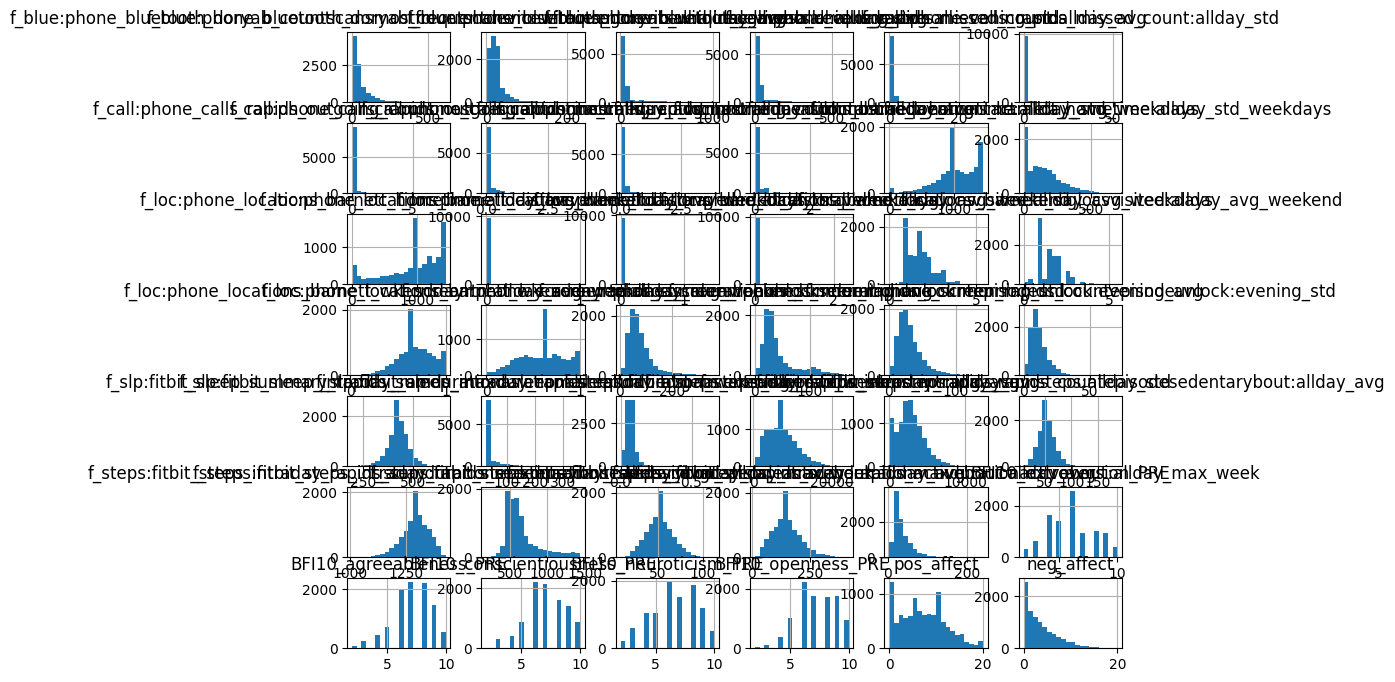

In [8]:
non_normalized_data.hist(bins=20, figsize=(10, 8)) 

In [9]:
for col in non_normalized_data.columns:
    print(col)

f_blue:phone_bluetooth_doryab_countscansmostfrequentdevicewithinsegmentsall:allday_avg
f_blue:phone_bluetooth_doryab_countscansmostfrequentdevicewithinsegmentsall:allday_std
f_blue:phone_bluetooth_doryab_uniquedevicesall:evening_avg
f_blue:phone_bluetooth_doryab_uniquedevicesall:evening_std
f_call:phone_calls_rapids_missed_count:allday_avg
f_call:phone_calls_rapids_missed_count:allday_std
f_call:phone_calls_rapids_outgoing_countmostfrequentcontact:allday_avg
f_call:phone_calls_rapids_outgoing_countmostfrequentcontact:allday_std
f_call:phone_calls_rapids_incoming_countmostfrequentcontact:allday_avg
f_call:phone_calls_rapids_incoming_countmostfrequentcontact:allday_std
f_loc:phone_locations_barnett_hometime:allday_avg_weekdays
f_loc:phone_locations_barnett_hometime:allday_std_weekdays
f_loc:phone_locations_barnett_hometime:allday_avg_weekend
f_loc:phone_locations_barnett_disttravelled:allday_avg_weekdays
f_loc:phone_locations_barnett_disttravelled:allday_std_weekdays
f_loc:phone_location

In [10]:
na_counts = non_normalized_data.isna().sum()
print(na_counts)

f_blue:phone_bluetooth_doryab_countscansmostfrequentdevicewithinsegmentsall:allday_avg      0
f_blue:phone_bluetooth_doryab_countscansmostfrequentdevicewithinsegmentsall:allday_std      0
f_blue:phone_bluetooth_doryab_uniquedevicesall:evening_avg                                  0
f_blue:phone_bluetooth_doryab_uniquedevicesall:evening_std                                  0
f_call:phone_calls_rapids_missed_count:allday_avg                                           0
f_call:phone_calls_rapids_missed_count:allday_std                                           0
f_call:phone_calls_rapids_outgoing_countmostfrequentcontact:allday_avg                      0
f_call:phone_calls_rapids_outgoing_countmostfrequentcontact:allday_std                      0
f_call:phone_calls_rapids_incoming_countmostfrequentcontact:allday_avg                      0
f_call:phone_calls_rapids_incoming_countmostfrequentcontact:allday_std                      0
f_loc:phone_locations_barnett_hometime:allday_avg_weekdays  

In [11]:
non_normalized_data.to_csv('non_normalized_full_data.csv')